# **ii. Selector de velocidades**#
Iones procedentes de una fuente entran, con velocidades
diferentes, en una región donde hay un campo eléctrico
perpendicular a la dirección de entrada y un campo magnético
perpendicular al eléctrico y a la dirección de entrada. Regulando
los valores de los campos seleccionamos sólo las partículas con una
determinada velocidad, de manera que, sólo ellas, realizarán un
movimiento rectilíneo y acabarán saliendo por una pequeña
abertura en la pared del selector de velocidades.

![selector](https://drive.google.com/uc?id=1gauC33fkday_WBeuUIO0zhqwK7QBK0vJ)



Sea una partícula de masa $m$, carga $q>0$ y energía cinética $E_c$. Una diferencia de potencial $\Delta V$, una distancia entre las placas de $h$ y un campo magnético $B$ (de valor, en este caso, desconocido). Tenemos una fuerza de Lorentz tal que:

$$F_y = q·E-q·v_x·B$$

Con $E = \frac{\Delta V}{h}$ y $v_x=\sqrt{\frac{2E_c}{m}}$

Donde: $F_y = 0$, es la condición para que la partícula pase por la segunda ranura. En ese caso $E= v_x·B$. Así calculamos el campo magnético necesario para limitar la velocidad.  



###**Cálculo analítico**###


In [1]:
# Cargamos las librerias necesarias.
import numpy as np
import math
import random
import matplotlib.pyplot as plt
#import bqplot.pyplot as plt
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties
import matplotlib.mlab as mlab
from scipy.integrate import odeint
from scipy.signal import find_peaks

###########################################
DNI= 45452963          # introduce tu DNI sin letra
##############################################3

random.seed(DNI)
# Energía cinética (eV), entre 10 y 50 eV.
Ek=random.randrange(10,50,1) # eV
# Diferencia de potencial entre las placas (V), entre 20 y 30V.
dV=random.randrange(20,30,1) # V

print('Valores para Ek= {:} J y V= {:} V'.format(Ek,dV))

Valores para Ek= 29 J y V= 27 V


In [2]:
############## Partículas a estudiar    ###############################
# Definimos un diccionario con todas las particulas a calcular con su valor de masa y carga
# particula = {nombre : [masa (Kg), carga(C)]}
iones={'1p+': [1.67E-27, 1.6E-19],'1e-': [9.11E-31, -1.6E-19],'1e+': [9.11E-31, 1.6E-19],
       '1H+': [1.66E-27, 1.6E-19], '2H+': [3.32E-27, 1.6E-19],'3H+': [4.98E-27, 1.6E-19],'4H+': [6.688E-22, 1.6E-19],
       '3He+': [5.0052E-27, 1.6E-19],'4He+': [6.6465E-27, 1.6E-19],'4He++': [6.6465E-27, 3.2E-19],
       '12C+': [19.93E-27, 1.6E-19], '13C+': [21.59E-27, 1.6E-19], '14C+': [23.25E-27, 1.6E-19],
       '16O+': [26.56E-27, 1.6E-19], '17O+': [28.23E-27, 1.6E-19], '18O+': [29.89E-27, 1.6E-19],
       '32S+': [53.10E-27, 1.6E-19], '33S+': [54.75E-27, 1.6E-19], '34S+': [56.41E-27, 1.6E-19],
       '35Cl+': [58.10E-27, 1.6E-19], '36Cl+': [59.76E-27, 1.6E-19], '37Cl+': [61.38E-27, 1.6E-19],
       '40Ca+': [66.36E-27, 1.6E-19], '42Ca+': [69.67E-27, 1.6E-19], '43Ca+': [71.13E-27, 1.6E-19]}
ni = len(iones)


In [3]:


ion='1H+'
m=iones[ion][0] #  Masa del ion (Kg)
q=iones[ion][1] # Carga del ion (C)

#q = 1.67E-27 # Carga del ion (C)
#m = 1 # Masa del ion (Kg)

h = 0.2 # Distancia entre las placas del condensador (m)
#dV =24.23 # Diferencia de potencial entre las placas (V), entre 20 y 30V.

# Sabiendo la diferencia de potencial entre las dos placas calculamos el módulo del campo E
E = dV/h # Campo eléctrico (V/m)
#E=10
L=1 # Longitud del condensador (m)
dy=0.005     # 2*dy 

# Conservación de la energía 
#Ek=47 # Energía cinética (eV), entre 10 y 50 eV.
Ec= Ek*1.602E-19 # Energía cinética (J) 
#Ec=7.32E-18 

# A partir de la expresión de la energía cinética 
v=np.sqrt(2*Ec/m)
#v=16530

# Tiempo que tarda en recorrer el selector, distancia L.
t=np.sqrt(L**2*m/2/Ec)


# Expresamos la relación entre las fuerzas E y B
# Fe =q*E=-q*v x B = -Fm
# Cuyos modulos dan q*E = q*v*B
#B=E/v
B=dV/h*np.sqrt(m/2/Ec)

print('Ec: {:.4E} J'.format(Ec))
print('Campo eléctrico: E= {:.1f} V/m'.format(E))
print('Velocidad de la partícula: v= {:.3E} m/s'.format(v))
print('Campo magnético: B= {:.5E} T'.format(B))
print('Tiempo que tarda en recorrer L: t= {:.3E} s'.format(t))

Ec: 4.6458E-18 J
Campo eléctrico: E= 135.0 V/m
Velocidad de la partícula: v= 7.482E+04 m/s
Campo magnético: B= 1.80444E-03 T
Tiempo que tarda en recorrer L: t= 1.337E-05 s


### **Cálculo numérico** ####
Ecuaciones de movimiento de una partícula cargada en un campo eléctrico $E$ y en un campo magnético $B$. Solución numérica.

$$
\left.
\begin{array}{rcl}
m\frac{d^2x}{dt^2}=q·v_y ·B\\
m\frac{d^2y}{dt^2}=q·\frac{\Delta V}{h}-q·v_x·B\\
\end{array}
\right\}
$$

Cambio de variable para tener cuatro ecuaciones integrales de primer orden.

$$
\left.
\begin{array}{rcl}
\frac{dx}{dt}=v_x\\
\frac{dv_x}{dt}=\frac{q}{m}·v_y ·B\\
\frac{dy}{dt}=v_y\\
\frac{dv_y}{dt}=\frac{q}{m}·\frac{\Delta V}{h}-\frac{q}{m}·v_x·B\\
\end{array}
\right\}
$$


Definimos la función que calculará la posición de la partícula cargada dentro de las dos placas del condensador

In [4]:
def selector(z,t,par):
    x,vx,y,vy=z
    # delimita la zona de acción del los campos E y B
    if x > 0 and x < L:
      cB=1.
      cE=1.
    else:
      cB=0.
      cE=0.
    
    # yy como el valor absoluto de y, simetria respecto a y=0
    yy=np.abs(y)  # 
     
    # limita el movimiento de la partícula
    if yy >   :
        vx=0.
        vy=0.
    # limita la partícula 
    if x > L and yy>dy:
        vx=0.
        vy=0.
       
    dzdt=[vx, qm*vy*cB*B, vy, qm*cE*E-qm*vx*cB*B]
    return dzdt

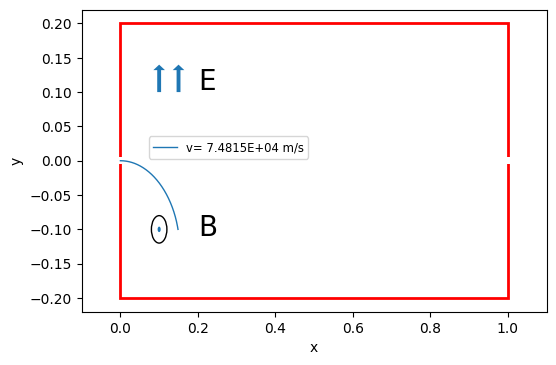

In [5]:
# Campo magnetico
#B=dV/h*np.sqrt(m/2/Ec)
B= 6.25E-03 # 

# Energía cinética del ion que entra en el detector
#Ek= 30 # Energía cinética (eV), entre 10 y 50 eV.
#Ec= Ek*1.602E-19 # Energía cinética (J) 

#Velocidad del ion que entra al selector
vx0 = np.sqrt(2*Ec/m) 

# tamaño de la apertura que hay en la salida del detector
#dy=0.005     # 2*dy 
tf=1E-3   # tiempo final de simulacion
#tf=2.5*ts

# 
nt=100000
z0=[0,vx0,0,0.0]

#   
t=np.linspace(0,tf,nt)
abserr = 1.0e-8
relerr = 1.0e-6

qm=q/m
par=[qm,E,B,L,h,dy]
#Llamada a la rutina odeint que resuelve las ecuaciones de movimiento
z=odeint(selector,z0,t,args=(par,),atol=abserr, rtol=relerr)
x = z[:,0]
y = z[:,2]


#print('Campo eléctrico: {:.1f} V/m'.format(E))
#print('Velocidad de la partícula: {:.3E} m/s'.format(v))
#print('Campo magnético: {:.3E} T'.format(B))

# Definicion del grafico 
# Cambiar los limites de acuerdo a lo que se necesite
# asi como los titulos de los ejes y los labels


fig=plt.figure()
fig.set_dpi(100)
#fig.set_size_inches(6,6)

ax = plt.axes(xlim=(-0.1,L+0.1), ylim=(-0.02-h,h+0.02))

line1, = ax.plot(x,y, linewidth=1, label='v= {:.4E} m/s'.format(vx0))

fontP = FontProperties()
fontP.set_size('small')

ax.legend(loc=0, ncol=1, bbox_to_anchor=(0.5, 0.6),prop = fontP,fancybox=True,shadow=False)

ax.set_ylabel("y")
ax.set_xlabel("x")

#line,=ax.plot([],[],lw=2)
#ax.legend(loc='lower right')

# Crea rectangulos, flechas en el dibujo
rect1 = patches.Rectangle((0,-h),L,h*2,linewidth=2,edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((-dy,-dy),3*dy,2*dy,linewidth=2,edgecolor='none',facecolor='w')
rect3 = patches.Rectangle((L-dy,-dy),3*dy,2*dy,linewidth=2,edgecolor='none',facecolor='w')

arrow1= patches.Arrow(0.1*L,0.5*h,0.0,0.2*h,width=0.05)
arrow2= patches.Arrow(0.15*L,0.5*h,0.0,0.2*h,width=0.05)

# Create true circle at center xy = (x, y) with given radius.
# matplotlib.patches.Circle(xy, radius=5, **kwargs)[source]
circle1=patches.Circle((0.1*L,-0.5*h),0.1*h,fill=False)
circle2=patches.Circle((0.1*L,-0.5*h),0.02*h)
            

# agrega los elementos anteriores al dibujo
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(arrow1)
ax.add_patch(arrow2)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.text(0.2*L,-0.55*h, "B",fontsize=20)
ax.text(0.2*L, 0.52*h, "E", fontsize=20)


plt.show()




### Datos de entrada:


El programa calcula la trayectoria en un selector de velocidad de un ion con una velocidad dada, y la del mismo ion pero con una velocidad un 10% mayor y un 10% menor.

In [6]:


# Energía cinética del ion que entra en el detector
# Conservación de la energía 
#Ek= 30 # Energía cinética (eV), entre 10 y 50 eV.
#Ec= Ek*1.602E-19 # Energía cinética (J) 
#Ec=0.5
#Ecr=(np.random.rand())*40+10
#Ec=round(Ecr,2)

#Velocidad del ion que entra al selector
#vx0=np.sqrt(2*Ec/m)
#vx0=7.6094E4  
vx1=1.1*vx0
vx2=0.9*vx0
print('vx0= {:.3E} m/s'.format(vx0))
print('vx1= {:.3E} m/s'.format(vx1))
print('vx2= {:.3E} m/s'.format(vx2))


# tamaño de la apertura que hay en la salida del detector
#dy=0.01 # 2*dy 
tf=1.0E-3   # tiempo final de simulacion

qm=q/m
par=[qm,E,B,L,h,dy]

# condiciones iniciales
z00=[-0.1,  ,0.0,0.0]
z01=[-0.1,   ,0.0,0.0]
z02=[-0.1,   ,0.0,0.0]

#Llamada a la rutina odeint que resuelve las ecuaciones de movimiento
nt=10000
# vector de tiempos  
t=np.linspace(0,tf,nt)
abserr = 1.0e-8
relerr = 1.0e-6

# odeint(funcion a integrar, condiciones iniciales, tiempos, argumentos, atol, rtol)
z1=odeint(selector,z00,t,args=(par,),atol=abserr, rtol=relerr)
z2=odeint(                                                    )
z3=odeint(                                                   )

# Definicion del grafico 
# Cambiar los limites de acuerdo a lo que se necesite
# asi como los titulos de los ejes y los labels
fig=plt.figure()
fig.set_dpi(100)
#fig.set_size_inches(7,6.5)


ax = plt.axes(xlim=(-0.1,L+0.1), ylim=(-0.02-h,h+0.02))

line1, = ax.plot(z1[:,0],z1[:,2], linewidth=1, label='v=v0='+str(vx0))
line2, = ax.plot(z2[:,0],z2[:,2], linewidth=1, label='v=1.1*v0='+str(vx1))
line3, = ax.plot(z3[:,0],z3[:,2], linewidth=1, label='v=0.9*v0='+str(vx2))
ax.legend(loc=0, ncol=1, bbox_to_anchor=(0.5, 0.6), fancybox=True,shadow=False)

ax.set_ylabel("y")
ax.set_xlabel("x")


#line,=ax.plot([],[],lw=400)


# Crea rectangulos, flechas en el dibujo
rect1 = patches.Rectangle((0,-h),L,h*2,linewidth=2,edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((-dy,-dy),3*dy,2*dy,linewidth=2,edgecolor='none',facecolor='w')
rect3 = patches.Rectangle((L-dy,-dy),3*dy,2*dy,linewidth=2,edgecolor='none',facecolor='w')

arrow1= patches.Arrow(0.1*L,0.5*h,0.0,0.2*h,width=0.03*L)
arrow2= patches.Arrow(0.15*L,0.5*h,0.0,0.2*h,width=0.03*L)

circle1=patches.Circle((0.1*L,-0.5*h),0.1*h,fill=False)
circle2=patches.Circle((0.1*L,-0.5*h),0.02*h)
            

# agrega los elementos anteriores al dibujo
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(arrow1)
ax.add_patch(arrow2)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.text(0.2*L,-0.55*h, "B",fontsize=20)
ax.text(0.2*L, 0.52*h, "E", fontsize=20)

plt.show()


SyntaxError: ignored